In [11]:
# https://www.tensorflow.org/tutorials/keras/classification

# imports

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [12]:
# jeu de données
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [13]:
# etiquettes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
# quelques infos
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [15]:
# prétraiter les données (normaliser valeurs, ici de 0 à 255 => 0 à 1)
train_images = train_images / 255.0
test_images = test_images / 255.0

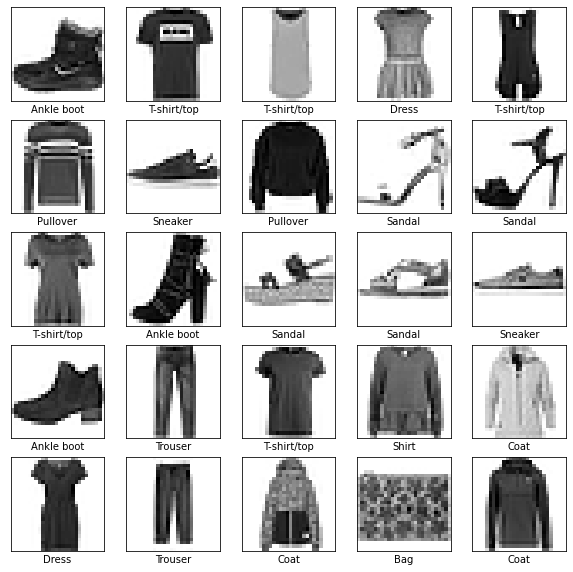

In [16]:
# vérification : affichage 25 images avec leur classe
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
# configuration des couches
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # transformation en une ligne
    tf.keras.layers.Dense(128, activation='relu'), # 1re couche à 128 noeuds
    tf.keras.layers.Dense(10)
])
# la fonction d'activation relu, ou Rectified Linear Unit : f(x) = max(0,x)
# Chaque nœud contient un score qui indique que l'image actuelle appartient à l'une des 10 classes.

In [19]:
# Fonction de perte -Cette mesure la précision du modèle est au cours de la formation. Vous voulez minimiser cette fonction pour "orienter" le modèle dans la bonne direction.
# Optimizer -Ce est comment le modèle est mis à jour en fonction des données qu'il voit et sa fonction de perte.
# Metrics -Utilisé pour suivre la formation et les étapes d' essai. L'exemple suivant utilise la précision, la fraction des images correctement classées.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 1ms/step - loss: 0.5017 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3757 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3375 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3139 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2963 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2839 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2703 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2603 - accuracy: 0.9026
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2504 - accuracy: 0.9062
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.241

In [22]:
# évaluer la précision sur les tests
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3453 - accuracy: 0.8794

Test accuracy: 0.8794000148773193


In [23]:
# transformer les logits en probabilités
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [24]:
predictions[0]

array([1.1114320e-06, 4.0068734e-08, 8.7995872e-08, 2.1630834e-07,
       2.1911835e-07, 1.5441615e-04, 1.0058314e-05, 4.3252643e-02,
       5.1789067e-07, 9.5658070e-01], dtype=float32)

In [25]:
np.argmax(predictions[0])

9

In [26]:
test_labels[0]

9

In [27]:
# graphique
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

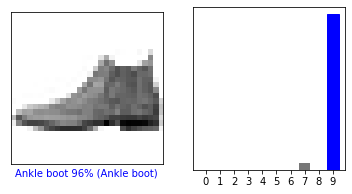

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

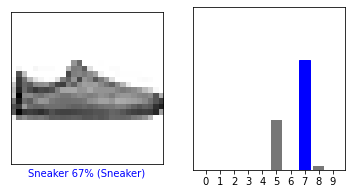

In [29]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

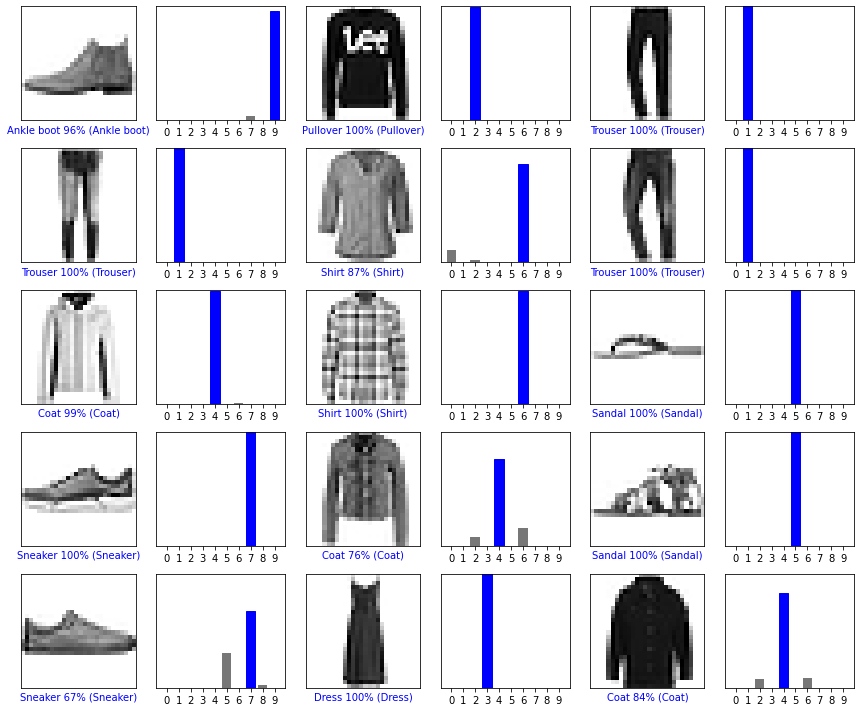

In [30]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [31]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [32]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [33]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[4.9932128e-06 3.3818349e-14 9.9621707e-01 1.3810204e-07 1.8790354e-03
  9.4567326e-11 1.8988365e-03 1.2628277e-17 1.6959183e-12 8.7712517e-16]]


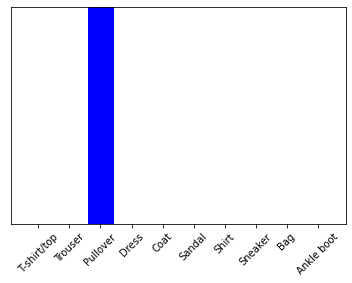

In [34]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [35]:
np.argmax(predictions_single[0])

2